# Classify images of clothing
### with Fashion MNIST dataset from keras

First import necessary library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Then import the Fashion MNIST dataset from keras


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Loading the dataset returns four NumPy arrays:

#### The train_images and train_labels arrays are the training set—the data the model uses to learn.
#### The model is tested against the test set, the test_images, and test_labels arrays.
#### The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore the data


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
len(y_train)

60000

Each label is an integer between 0 and 9:

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(y_test)

10000

In [9]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Preprocess the data
#### The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

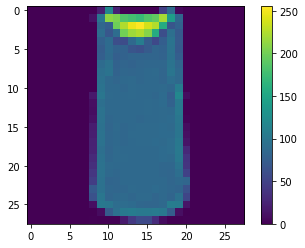

In [15]:
#using matplotlib
plt.figure()
plt.imshow(X_train[2])
plt.colorbar()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

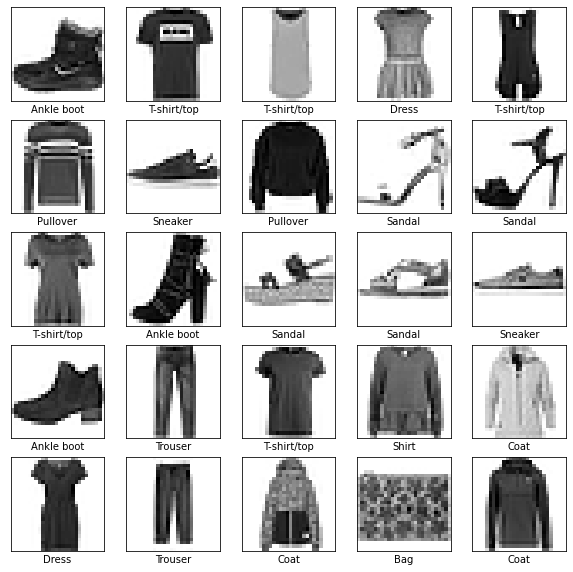

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as tf.keras.layers.Dense, have parameters that are learned during training.

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely connected, or fully connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

Compile the model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [49]:
model.fit(X_train, y_train, epochs=20, validation_batch_size=64, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1775 - accuracy: 0.9341 - val_loss: 0.1851 - val_accuracy: 0.9271
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1701 - accuracy: 0.9360 - val_loss: 0.1801 - val_accuracy: 0.9298
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1660 - accuracy: 0.9383 - val_loss: 0.1804 - val_accuracy: 0.9302
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1612 - accuracy: 0.9399 - val_loss: 0.1909 - val_accuracy: 0.9290
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1590 - accuracy: 0.9400 - val_loss: 0.1952 - val_accuracy: 0.9255
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1561 - accuracy: 0.9418 - val_loss: 0.2049 - val_accuracy: 0.9245
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1517 - accuracy: 0.9426 - val_loss: 0.2054 - val_accuracy:

## Evaluate accuracy
Next, compare how the model performs on the test dataset:

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.4635 - accuracy: 0.8863
Test accuracy: 0.8863000273704529


## Make predictions
Add softmax layer to the end of model to convert the logits to probabilities, which are easier to interpret.

In [34]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [37]:
predictions = probability_model.predict(X_test)

In [40]:
predictions[10]

array([1.4139207e-04, 7.1284583e-09, 4.3600243e-02, 3.2349042e-06,
       9.4179177e-01, 1.7466441e-09, 1.4456624e-02, 2.7145991e-10,
       6.6959133e-06, 6.7192518e-09], dtype=float32)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [41]:
y_test[10]

4

Graph this to look at the full set of 10 class predictions.

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

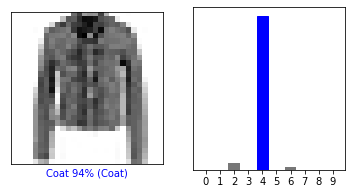

In [46]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

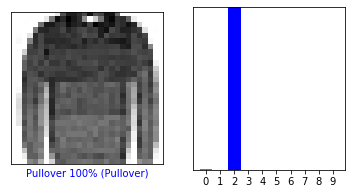

In [47]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

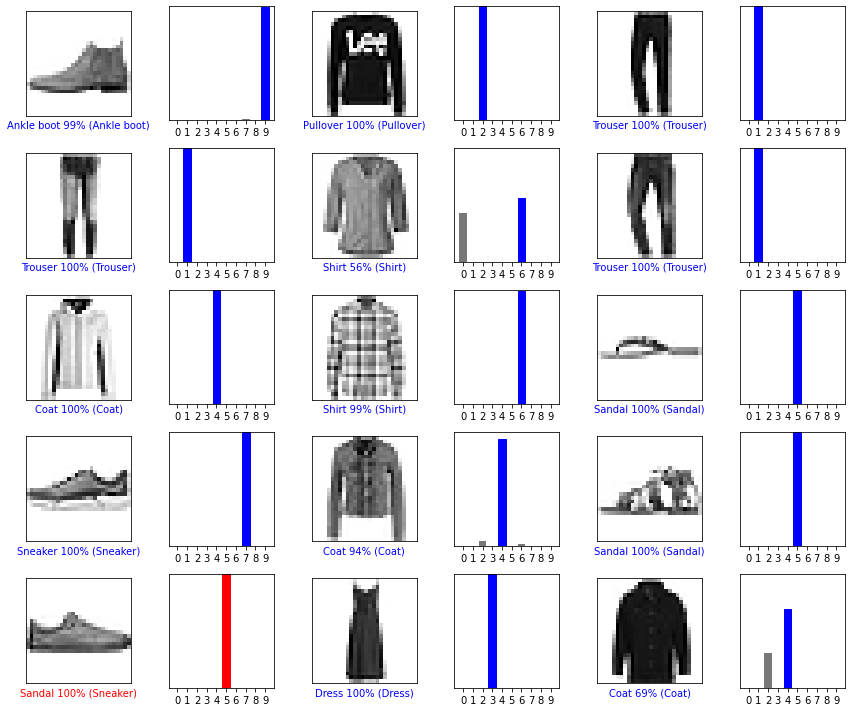

In [48]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()